In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import glacier
import glacier_v2
import cmocean
import importlib

In [4]:
importlib.reload(glacier)
ngridx=51
ngridz=21
D=200 # m
L=2e4 # m
dt= 2e2 # 
T= 1e6
zz=20 # dont use values on the second grid cell (unstable solution)
C,S=glacier.glacier(ngridx,ngridz,dt,zz,T,20,0.4/86400)
Cs, Ss =glacier.glacier(ngridx,ngridz,dt,zz,T,20,0.4/86400, steady = False)

In [5]:
# model perturbations

#1. changing the parameters in oxidation and evasion. 
#1a. Making the mixed layer dz bigger

Cs_ML40, Ss_ML40 =glacier.glacier(ngridx,ngridz,dt,zz,T,40,0.4/86400, steady = False)
Cs_ML60, Ss_ML60 =glacier.glacier(ngridx,ngridz,dt,zz,T,60,0.4/86400, steady = False)

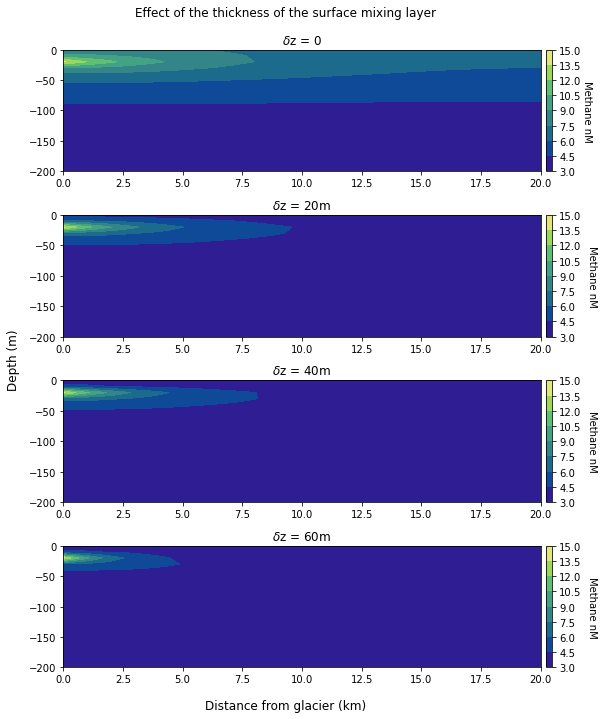

In [6]:
#compare results with different thicknesses of the mixing layer
cmap=cmocean.cm.haline
fig, axs=plt.subplots(4,1,figsize=(9,10))
z = np.linspace(0,D,ngridz)
x = np.linspace(0,L/1e3,ngridx)
X,Z=np.meshgrid(x,z)

c1=axs[0].contourf(X,-Z,C[-1,:,:].T,cmap=cmap)
cb1=fig.colorbar(c1,ax=axs[0],pad=0.01)
cb1.ax.get_yaxis().labelpad = 10
axs[0].set_title('$\delta$z = 0')
cb1.set_label('Methane nM', rotation=270)
c2=axs[1].contourf(X,-Z,Cs[-1,:,:].T,cmap=cmap)
cb2=fig.colorbar(c2,ax=axs[1],pad=0.01)
cb2.ax.get_yaxis().labelpad = 15
axs[1].set_title('$\delta$z = 20m')
cb2.set_label('Methane nM', rotation=270)
fig.suptitle('Steady vs Sinks Methane Concentration',y=0.95,x=0.45)
c3=axs[2].contourf(X,-Z,Cs_ML40[-1,:,:].T,cmap=cmap)
cb3=fig.colorbar(c3,ax=axs[2],pad=0.01)
cb3.ax.get_yaxis().labelpad = 15
axs[2].set_title('$\delta$z = 40m')
cb3.set_label('Methane nM', rotation=270)
c4=axs[3].contourf(X,-Z,Cs_ML60[-1,:,:].T,cmap=cmap)
cb4=fig.colorbar(c4,ax=axs[3],pad=0.01)
cb4.ax.get_yaxis().labelpad = 15
axs[3].set_title('$\delta$z = 60m')
cb4.set_label('Methane nM', rotation=270)
fig.suptitle('Effect of the thickness of the surface mixing layer',y=0.99,x=0.45)
fig.supxlabel('Distance from glacier (km)',x=0.45)
fig.supylabel('Depth (m)',x=0.02)
plt.tight_layout()
#plt.savefig('ML_sensitivity.pdf')

In [9]:
# how thick does the mixing layer have to be for no diffusion to occur?
Cs_ML80, Ss_ML80 =glacier.glacier(ngridx,ngridz,dt,zz,T,80,0.4/86400, steady = False)
#Cs_ML120, Ss_ML120 =glacier.glacier(ngridx,ngridz,dt,zz,T,120,0.4/86400, steady = False)
Cs_ML200, Ss_ML200 =glacier.glacier(ngridx,ngridz,dt,zz,T,200,0.4/86400, steady = False)

Text(0.45, 0.95, 'Limit of Mixing Layer Thickness')

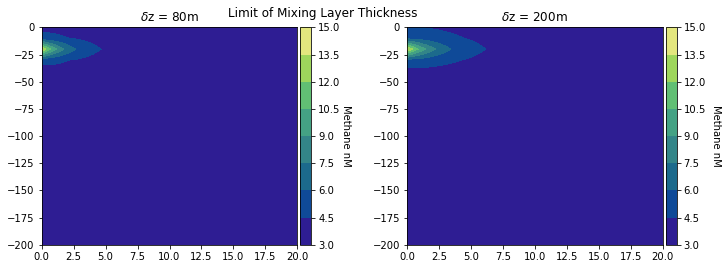

In [10]:
cmap=cmocean.cm.haline
fig, axs=plt.subplots(1,2,figsize=(12,4))
z = np.linspace(0,D,ngridz)
x = np.linspace(0,L/1e3,ngridx)
X,Z=np.meshgrid(x,z)

c1=axs[0].contourf(X,-Z,Cs_ML80[-1,:,:].T,cmap=cmap)
cb1=fig.colorbar(c1,ax=axs[0],pad=0.01)
cb1.ax.get_yaxis().labelpad = 10
axs[0].set_title('$\delta$z = 80m')
cb1.set_label('Methane nM', rotation=270)
c2=axs[1].contourf(X,-Z,Cs_ML200[-1,:,:].T,cmap=cmap)
cb2=fig.colorbar(c2,ax=axs[1],pad=0.01)
cb2.ax.get_yaxis().labelpad = 15
axs[1].set_title('$\delta$z = 200m')
cb2.set_label('Methane nM', rotation=270)
fig.suptitle('Limit of Mixing Layer Thickness',y=0.95,x=0.45)
#plt.savefig('Max_ML.pdf')

# once the ML is ~80m deep, increasing it any further doesnt really have a big effect on the size of the plume anymore.

In [23]:
# testing the effect of changing the oxidation parameter alpha

Cs_alpha4, Ss_alpha4 =glacier.glacier(ngridx,ngridz,dt,zz,T,20,4/86400, steady = False)
Cs_alpha40, Ss_alpha40 =glacier.glacier(ngridx,ngridz,dt,zz,T,20,40/86400, steady = False)
#Cs_alpha400, Ss_alpha400 =glacier.glacier(ngridx,ngridz,dt,zz,T,20,400/86400, steady = False)

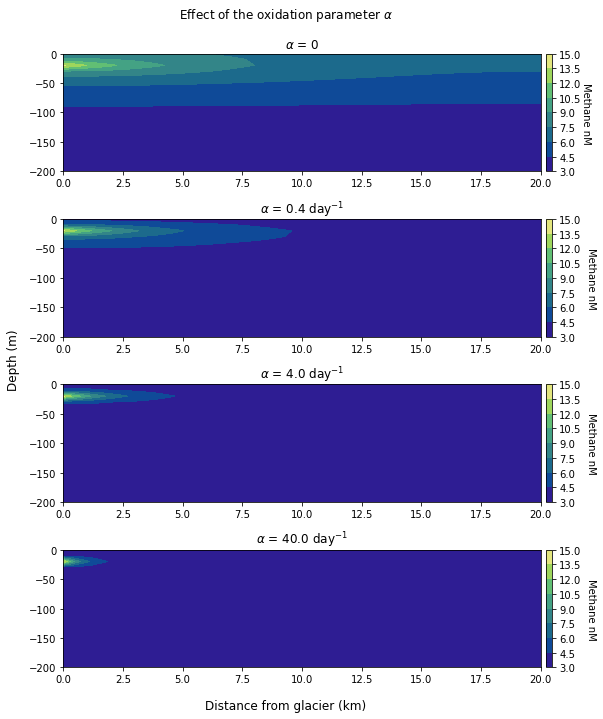

In [40]:
#compare results with different thicknesses of the mixing layer
cmap=cmocean.cm.haline
fig, axs=plt.subplots(4,1,figsize=(9,10))
z = np.linspace(0,D,ngridz)
x = np.linspace(0,L/1e3,ngridx)
X,Z=np.meshgrid(x,z)

c1=axs[0].contourf(X,-Z,C[-1,:,:].T,cmap=cmap)
cb1=fig.colorbar(c1,ax=axs[0],pad=0.01)
cb1.ax.get_yaxis().labelpad = 10
axs[0].set_title('$\\alpha$ = 0')
cb1.set_label('Methane nM', rotation=270)
c2=axs[1].contourf(X,-Z,Cs[-1,:,:].T,cmap=cmap)
cb2=fig.colorbar(c2,ax=axs[1],pad=0.01)
cb2.ax.get_yaxis().labelpad = 15
axs[1].set_title('$\\alpha$ = 0.4 day$^{-1}$')
cb2.set_label('Methane nM', rotation=270)
fig.suptitle('Steady vs Sinks Methane Concentration',y=0.95,x=0.45)
c3=axs[2].contourf(X,-Z,Cs_alpha4[-1,:,:].T,cmap=cmap)
cb3=fig.colorbar(c3,ax=axs[2],pad=0.01)
cb3.ax.get_yaxis().labelpad = 15
axs[2].set_title('$\\alpha$ = 4.0 day$^{-1}$')
cb3.set_label('Methane nM', rotation=270)
c4=axs[3].contourf(X,-Z,Cs_alpha40[-1,:,:].T,cmap=cmap)
cb4=fig.colorbar(c4,ax=axs[3],pad=0.01)
cb4.ax.get_yaxis().labelpad = 15
axs[3].set_title('$\\alpha$ = 40.0 day$^{-1}$')
cb4.set_label('Methane nM', rotation=270)
fig.suptitle('Effect of the oxidation parameter $\\alpha$',y=0.99,x=0.45)
fig.supxlabel('Distance from glacier (km)',x=0.45)
fig.supylabel('Depth (m)',x=0.02)
plt.tight_layout()
#plt.savefig('alpha_sensitivity.pdf')